In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras import layers, models

# Ekstrak file ZIP
dataset_zip = '/content/segmentasi.zip'
extract_path = '/content/segmentasi/segmentasi'

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Path dataset
IMAGE_PATH = os.path.join(extract_path, 'images')
MASK_PATH = os.path.join(extract_path, 'mask')

# Parameter
IMG_HEIGHT, IMG_WIDTH = 256, 256
BATCH_SIZE = 8
EPOCHS = 20

# Fungsi untuk memuat dan memproses gambar
def load_image(image_path, mask_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT)) / 255.0

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))
    mask = np.where(mask > 128, 1, 0).astype(np.float32)  # Binarisasi mask
    return image, mask

# Memuat dataset
image_files = sorted(os.listdir(IMAGE_PATH))
mask_files = sorted(os.listdir(MASK_PATH))

images, masks = [], []
for img_file, mask_file in zip(image_files, mask_files):
    img_path = os.path.join(IMAGE_PATH, img_file)
    mask_path = os.path.join(MASK_PATH, mask_file)
    img, mask = load_image(img_path, mask_path)
    images.append(img)
    masks.append(mask)

# Konversi ke numpy array
images = np.array(images, dtype=np.float32)
masks = np.array(masks, dtype=np.float32)
masks = np.expand_dims(masks, axis=-1)  # Shape: (N, H, W, 1)

# Model CNN sederhana
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same'),
        layers.UpSampling2D((2,2)),
        layers.Conv2DTranspose(32, (3,3), activation='relu', padding='same'),
        layers.UpSampling2D((2,2)),
        layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Inisialisasi model
model = build_model()

# Train model dengan seluruh dataset
history = model.fit(images, masks, epochs=EPOCHS, batch_size=BATCH_SIZE)

# Simpan model
model.save('/content/segmentasi_model.h5')

print("Model telah diekstrak, dilatih, dan disimpan!")

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4992 - loss: 0.6916
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5355 - loss: 0.6656
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5290 - loss: 0.6401
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5393 - loss: 0.6091
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7639 - loss: 0.5539
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8427 - loss: 0.4923
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8463 - loss: 0.4495
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8488 - loss: 0.4135
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8364 - loss: 0.3872
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8373 - loss: 0.3668
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8367 - loss: 0.3844
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8401 - loss: 0.3866
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━

Model telah diekstrak, dilatih, dan disimpan!


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import zipfile
from tensorflow.keras import layers, models, applications, callbacks

# Ekstrak file ZIP
dataset_zip = '/content/segmentasi.zip'
extract_path = '/content/segmentasi/segmentasi'

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Path dataset
IMAGE_PATH = os.path.join(extract_path, 'images')
MASK_PATH = os.path.join(extract_path, 'mask')

# Parameter
IMG_HEIGHT, IMG_WIDTH = 256, 256
BATCH_SIZE = 8
EPOCHS = 25  # Lebih banyak epoch karena dataset kecil

# Fungsi untuk memuat dan memproses gambar
def load_image(image_path, mask_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH)) / 255.0

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMG_HEIGHT, IMG_WIDTH))
    mask = np.where(mask > 128, 1, 0).astype(np.float32)  # Binarisasi mask
    return image, mask

# Memuat dataset
image_files = sorted(os.listdir(IMAGE_PATH))
mask_files = sorted(os.listdir(MASK_PATH))

images, masks = [], []
for img_file, mask_file in zip(image_files, mask_files):
    img_path = os.path.join(IMAGE_PATH, img_file)
    mask_path = os.path.join(MASK_PATH, mask_file)
    img, mask = load_image(img_path, mask_path)
    images.append(img)
    masks.append(mask)

# Konversi ke numpy array
images = np.array(images, dtype=np.float32)
masks = np.array(masks, dtype=np.float32)
masks = np.expand_dims(masks, axis=-1)  # Shape: (N, H, W, 1)

# Model U-Net dengan Transfer Learning
def build_unet():
    base_model = applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')

    # Encoder (Feature Extractor)
    encoder_layers = [base_model.get_layer(name).output for name in [
        'block_1_expand_relu', 'block_3_expand_relu', 'block_6_expand_relu', 'block_13_expand_relu', 'block_16_project'
    ]]

    encoder = models.Model(inputs=base_model.input, outputs=encoder_layers)
    encoder.trainable = False  # Freeze pre-trained layers

    # Decoder
    inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    features = encoder(inputs)

    x = features[-1]
    for feature in reversed(features[:-1]):
        x = layers.Conv2DTranspose(256, (3,3), strides=2, padding='same', activation='relu')(x)
        x = layers.Concatenate()([x, feature])

    x = layers.Conv2DTranspose(128, (3,3), strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(64, (3,3), strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(32, (3,3), strides=2, padding='same', activation='relu')(x)

    x = layers.Conv2D(1, (1,1), activation='sigmoid', padding='same')(x)
    x = layers.Resizing(IMG_HEIGHT, IMG_WIDTH)(x)  # Pastikan output sesuai ukuran target mask

    model = models.Model(inputs, x)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Inisialisasi model U-Net dengan transfer learning
model = build_unet()

# Callback untuk menyimpan model dengan akurasi terbaik
checkpoint_cb = callbacks.ModelCheckpoint('/content/segmentasi_model_unet_best.h5', save_best_only=True, monitor='accuracy', mode='max', verbose=1)

# Train model dengan seluruh dataset
history = model.fit(images, masks, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[checkpoint_cb])

print("Model U-Net dengan transfer learning telah dilatih dan disimpan!")

<ipython-input-10-5617e12b9225>:55: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.4994 - loss: 0.6930 
Epoch 1: accuracy improved from -inf to 0.50461, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 16s/step - accuracy: 0.5012 - loss: 0.6929
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.5307 - loss: 0.6829 
Epoch 2: accuracy improved from 0.50461 to 0.53245, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.5313 - loss: 0.6822
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.5520 - loss: 0.6570 
Epoch 3: accuracy improved from 0.53245 to 0.53998, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 17s/step - accuracy: 0.5480 - loss: 0.6568
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.7942 - loss: 0.6052 
Epoch 4: accuracy improved from 0.53998 to 0.80142, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.7966 - loss: 0.5983
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.7492 - loss: 0.5136 
Epoch 5: accuracy did not improve from 0.80142
2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 16s/step - accuracy: 0.7567 - loss: 0.5119
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.8725 - loss: 0.4017 
Epoch 6: accuracy improved from 0.80142 to 0.86736, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.8708 - loss: 0.4041
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.8847 - loss: 0.3348 
Epoch 7: accuracy improved from 0.86736 to 0.89018, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.8865 - loss: 0.3275
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9176 - loss: 0.2365 
Epoch 8: accuracy improved from 0.89018 to 0.91170, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9156 - loss: 0.2427
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9131 - loss: 0.2609 
Epoch 9: accuracy improved from 0.91170 to 0.91658, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 43s 18s/step - accuracy: 0.9143 - loss: 0.2571
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9232 - loss: 0.2265 
Epoch 10: accuracy improved from 0.91658 to 0.91713, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 43s 17s/step - accuracy: 0.9212 - loss: 0.2322
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9090 - loss: 0.2310 
Epoch 11: accuracy did not improve from 0.91713
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 16s/step - accuracy: 0.9092 - loss: 0.2310
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9192 - loss: 0.2247 
Epoch 12: accuracy improved from 0.91713 to 0.93472, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9244 - loss: 0.2138
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9193 - loss: 0.2185 
Epoch 13: accuracy did not improve from 0.93472
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9237 - loss: 0.2082
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9370 - loss: 0.1728 
Epoch 14: accuracy improved from 0.93472 to 0.93905, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9377 - loss: 0.1707
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9418 - loss: 0.1557 
Epoch 15: accuracy improved from 0.93905 to 0.94298, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 16s/step - accuracy: 0.9422 - loss: 0.1544
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9514 - loss: 0.1272 
Epoch 16: accuracy improved from 0.94298 to 0.94709, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 16s/step - accuracy: 0.9500 - loss: 0.1313
Epoch 17/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9562 - loss: 0.1200 
Epoch 17: accuracy improved from 0.94709 to 0.95307, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 16s/step - accuracy: 0.9551 - loss: 0.1225
Epoch 18/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9614 - loss: 0.1021 
Epoch 18: accuracy improved from 0.95307 to 0.95478, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9592 - loss: 0.1082
Epoch 19/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9628 - loss: 0.1007 
Epoch 19: accuracy improved from 0.95478 to 0.95951, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9617 - loss: 0.1040
Epoch 20/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9672 - loss: 0.0874 
Epoch 20: accuracy improved from 0.95951 to 0.96116, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 16s/step - accuracy: 0.9652 - loss: 0.0929
Epoch 21/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9605 - loss: 0.1072 
Epoch 21: accuracy improved from 0.96116 to 0.96296, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 16s/step - accuracy: 0.9613 - loss: 0.1044
Epoch 22/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9677 - loss: 0.0861 
Epoch 22: accuracy improved from 0.96296 to 0.96510, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 16s/step - accuracy: 0.9668 - loss: 0.0885
Epoch 23/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9632 - loss: 0.0949 
Epoch 23: accuracy improved from 0.96510 to 0.96582, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9641 - loss: 0.0928
Epoch 24/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9702 - loss: 0.0771 
Epoch 24: accuracy improved from 0.96582 to 0.96956, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 16s/step - accuracy: 0.9700 - loss: 0.0778
Epoch 25/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.9703 - loss: 0.0753 
Epoch 25: accuracy improved from 0.96956 to 0.97111, saving model to /content/segmentasi_model_unet_best.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 24s/step - accuracy: 0.9706 - loss: 0.0749
Model U-Net dengan transfer learning telah dilatih dan disimpan!


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


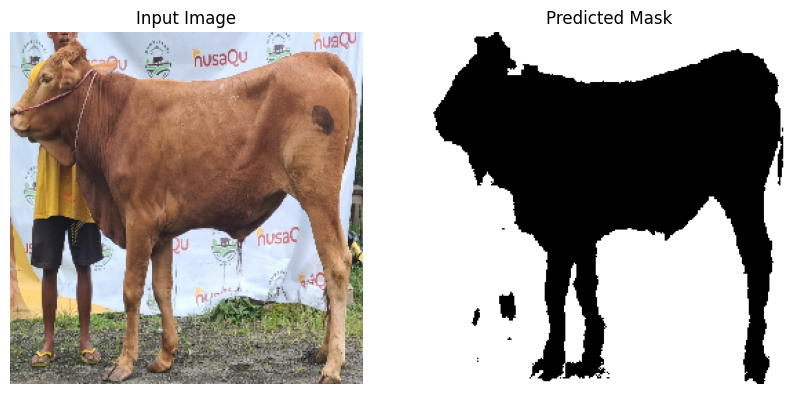

In [ ]:
# Fungsi untuk melakukan prediksi pada gambar baru
def predict_image(image_path, model_path='/content/segmentasi_model_unet_best.h5'):
    model = tf.keras.models.load_model(model_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT)) / 255.0
    image_input = np.expand_dims(image, axis=0)  # Tambahkan batch dimension

    pred_mask = model.predict(image_input)[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Binarisasi output

    # Tampilkan hasil
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Input Image')
    ax[0].axis('off')

    ax[1].imshow(pred_mask[:, :, 0], cmap='gray')
    ax[1].set_title('Predicted Mask')
    ax[1].axis('off')

    plt.show()

predict_image('/content/375.png')

Memproses: /content/datasetnolb/datasetnolb/180.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


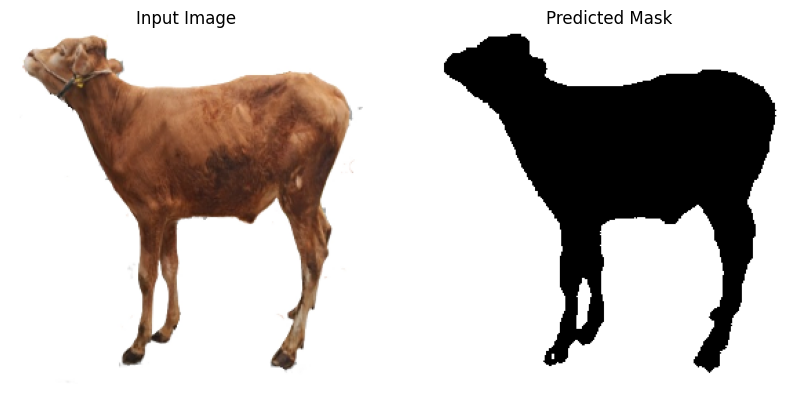

Memproses: /content/datasetnolb/datasetnolb/270.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


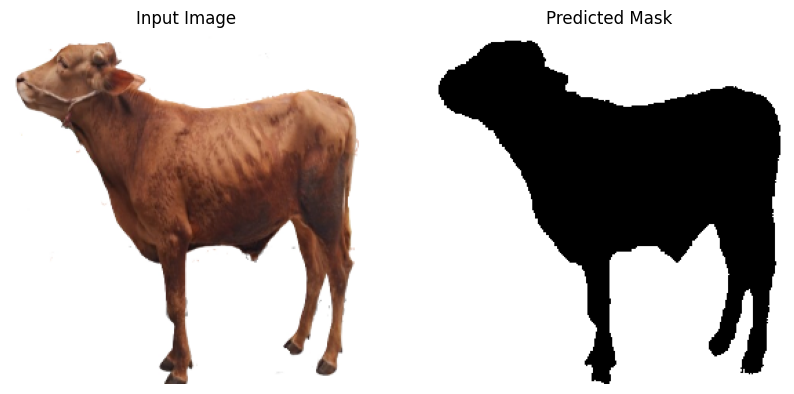

Memproses: /content/datasetnolb/datasetnolb/350.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


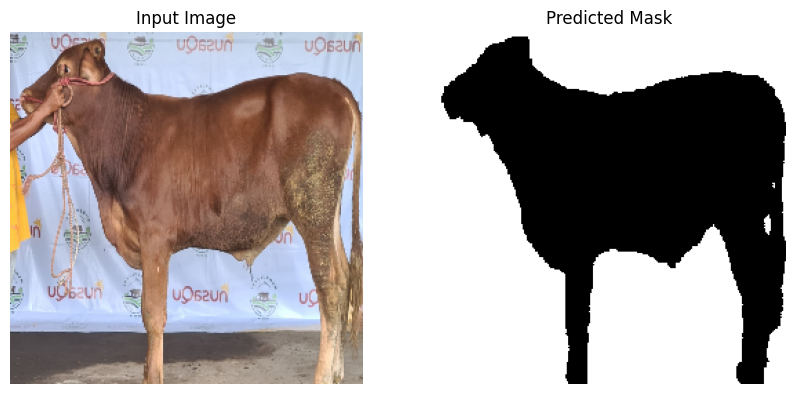

Memproses: /content/datasetnolb/datasetnolb/651.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


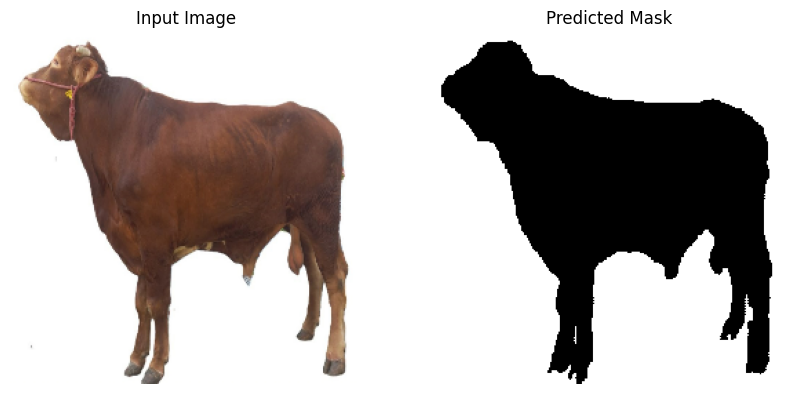

Memproses: /content/datasetnolb/datasetnolb/300.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


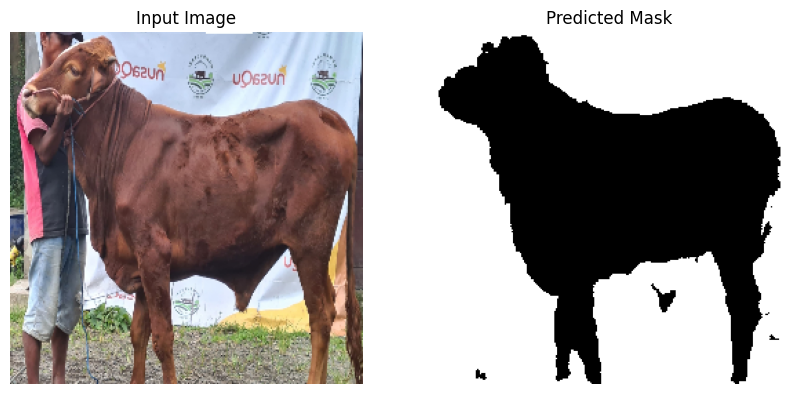

Memproses: /content/datasetnolb/datasetnolb/850.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


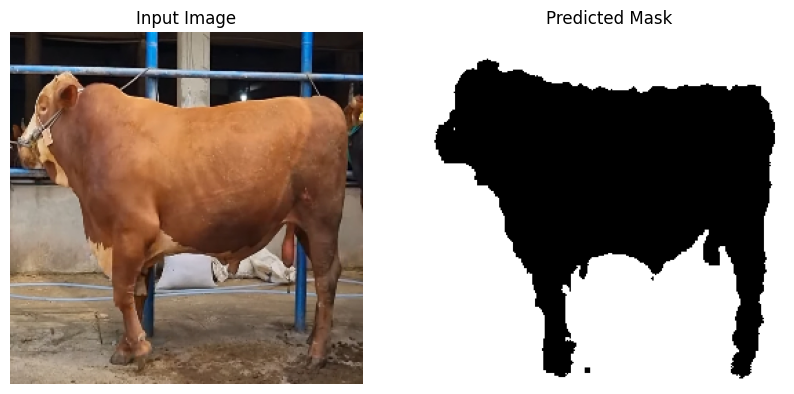

Memproses: /content/datasetnolb/datasetnolb/360.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


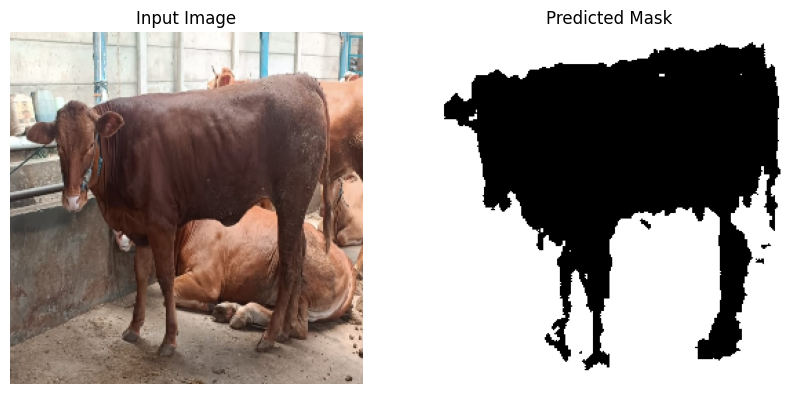

Memproses: /content/datasetnolb/datasetnolb/600.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


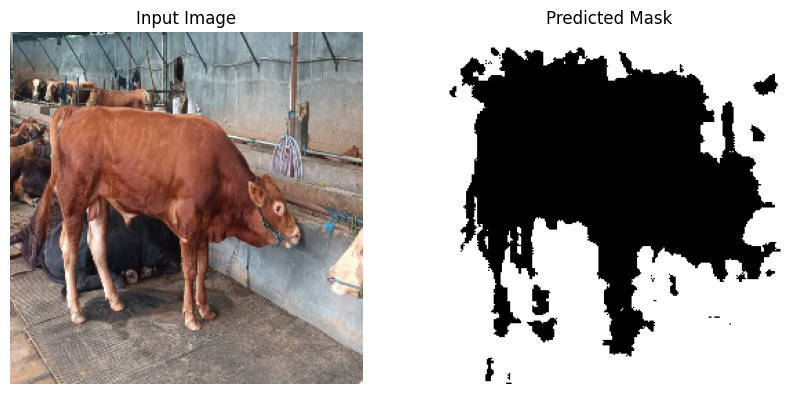

Memproses: /content/datasetnolb/datasetnolb/325.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


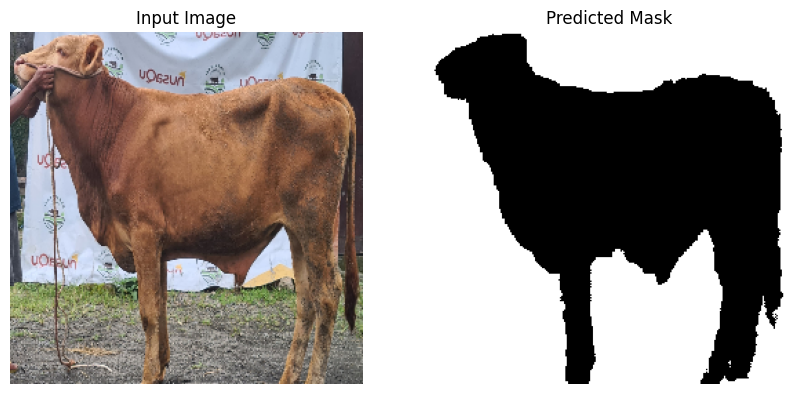

Memproses: /content/datasetnolb/datasetnolb/345.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


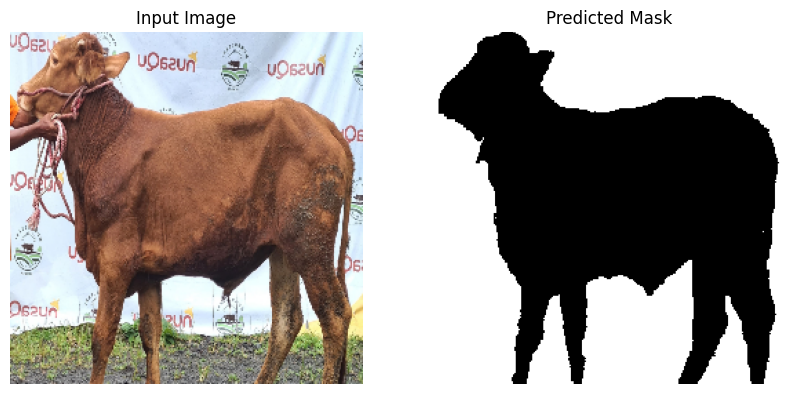

Memproses: /content/datasetnolb/datasetnolb/245.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


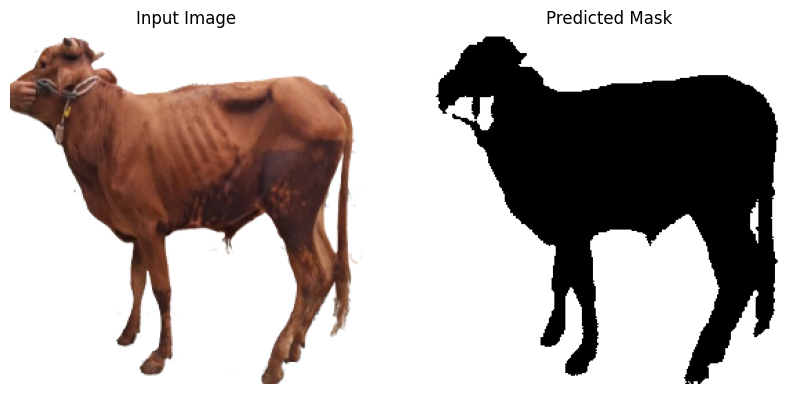

Memproses: /content/datasetnolb/datasetnolb/293.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


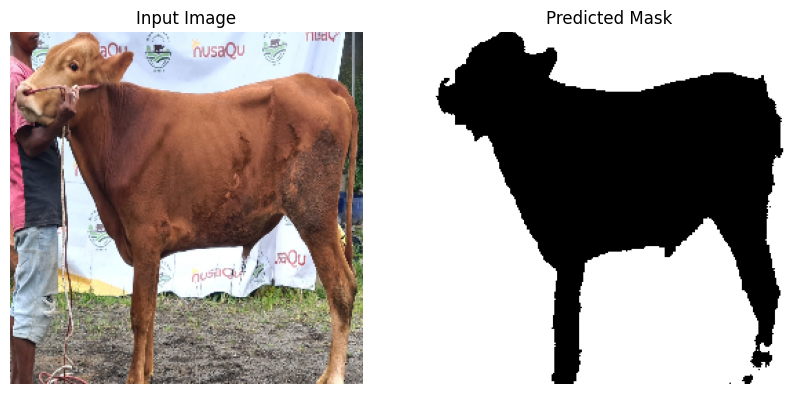

Memproses: /content/datasetnolb/datasetnolb/302.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


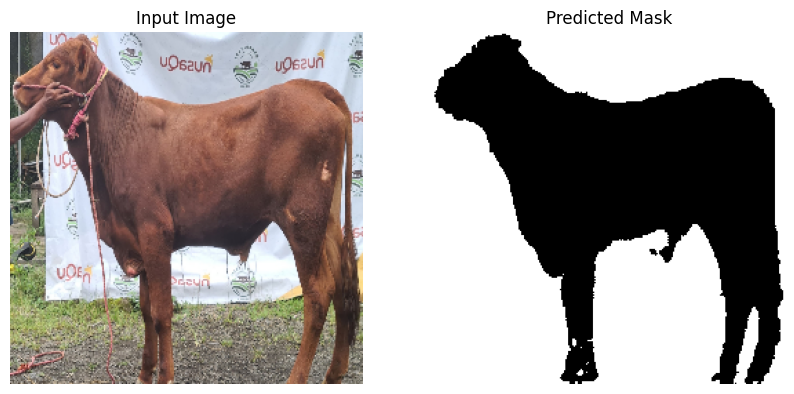

Memproses: /content/datasetnolb/datasetnolb/425.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


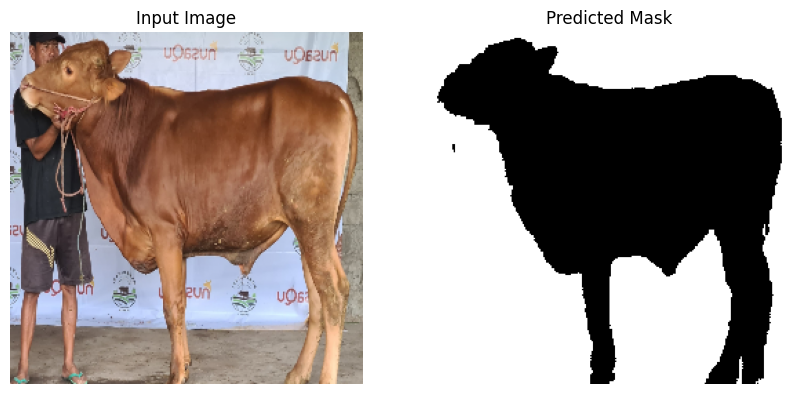

Memproses: /content/datasetnolb/datasetnolb/980.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


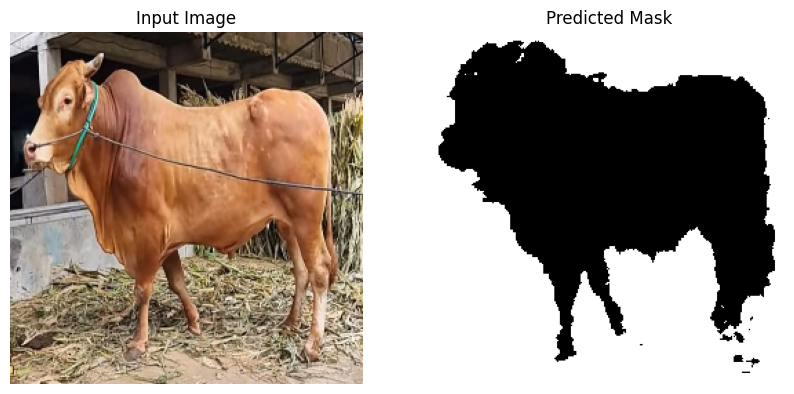

Memproses: /content/datasetnolb/datasetnolb/523.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


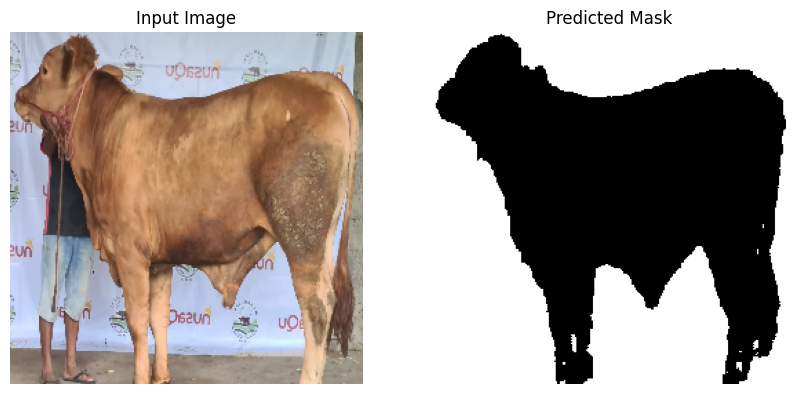

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import zipfile

# Ekstrak file ZIP dataset
zip_path = '/content/datasetnolb.zip'
extract_path = '/content/datasetnolb/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Fungsi untuk melakukan prediksi pada gambar baru
def predict_image(image_path, model_path='/content/segmentasi_model_unet_best.h5'):
    model = tf.keras.models.load_model(model_path)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error: Gagal membaca gambar dari {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH)) / 255.0
    image_input = np.expand_dims(image, axis=0)  # Tambahkan batch dimension

    pred_mask = model.predict(image_input)[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Binarisasi output

    # Tampilkan hasil
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Input Image')
    ax[0].axis('off')

    ax[1].imshow(pred_mask[:, :, 0], cmap='gray')
    ax[1].set_title('Predicted Mask')
    ax[1].axis('off')

    plt.show()

# Prediksi pada semua gambar di dataset
image_folder = os.path.join(extract_path, 'datasetnolb')  # Sesuaikan folder jika perlu
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

for img_path in image_files:
    print(f"Memproses: {img_path}")
    predict_image(img_path)
